## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer, one_hot
import gensim
from gensim.models import Word2Vec
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM, Conv1D, Dropout, MaxPooling1D, AvgPool1D
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
true_data = pd.read_csv('/content/drive/MyDrive/Fake_News_Kaggle/True.csv')
fake_data = pd.read_csv('/content/drive/MyDrive/Fake_News_Kaggle/Fake.csv')

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true_data.shape

(21417, 4)

In [ ]:
fake_data.shape

(23481, 4)

### **Distribution of Dataset**

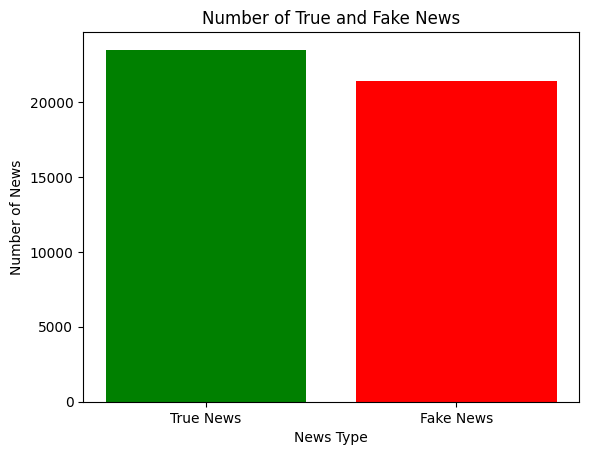

In [ ]:
labels = ['True News', 'Fake News']
heights = [len(fake_data.index), len(true_data.index)]
colors = ['green', 'red']
plt.bar(labels, heights, color=colors)
plt.xlabel('News Type')
plt.ylabel('Number of News')
plt.title('Number of True and Fake News')
plt.show()

# Distribution of both true and fake news is almost similar, hence dataset is balanced.

### **Visualize data based on subject category**

In [ ]:
fake_data['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

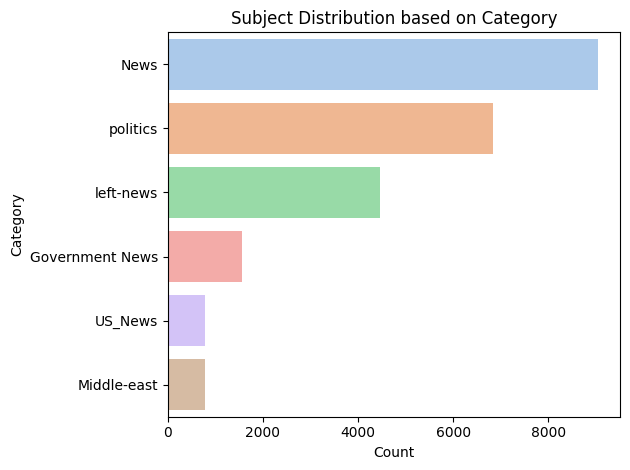

In [ ]:
category_counts = fake_data['subject'].value_counts()
category_counts_sorted = category_counts.sort_values(ascending=False)
colors = sns.color_palette('pastel')
# plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts_sorted.values, y=category_counts_sorted.index, palette=colors, width=0.8)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Subject Distribution based on Category')
plt.tight_layout()
plt.show()

### **Numerical Definition to True/False**

In [ ]:
true_data['label'] = 1;
true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_data['label'] = 0;
fake_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0



**WordCloud to plot the most frequent words**

In [ ]:
fake_text = ' '.join(fake_data['text'].tolist())

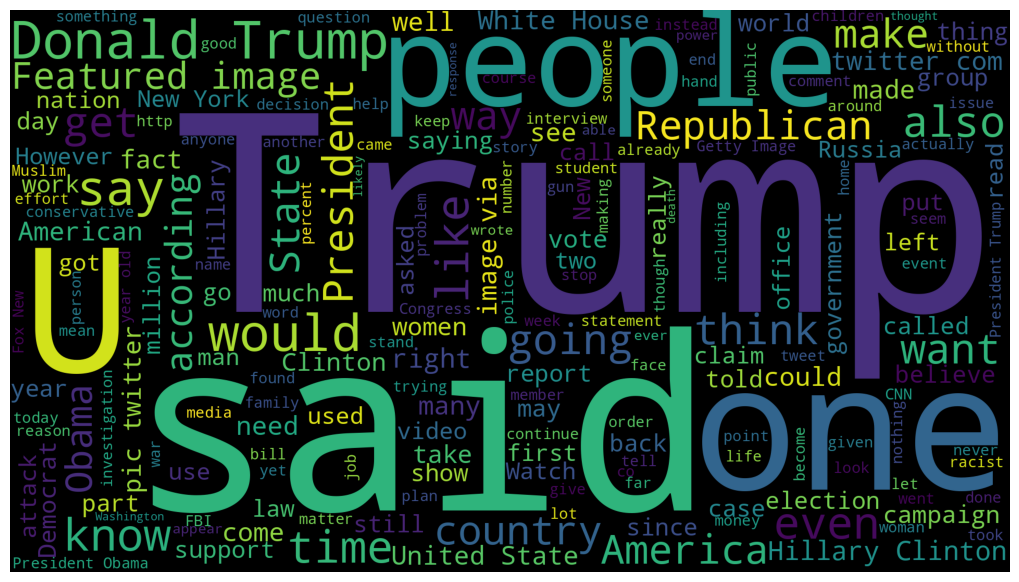

In [ ]:
wordcloud = WordCloud(width = 1920, height = 1080, stopwords = set(stopwords.words("english"))).generate(fake_text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Explore Real News Data**

In [ ]:
true_text = ' '.join(true_data['text'].tolist())

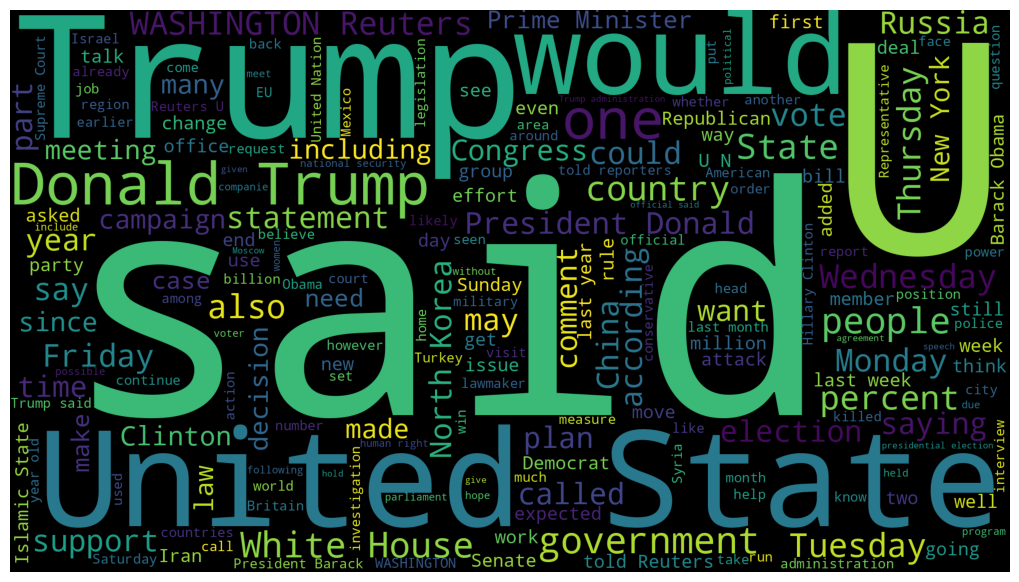

In [ ]:
wordcloud = WordCloud(width = 1920, height = 1080,stopwords = set(stopwords.words("english"))).generate(true_text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
true_data.sample(5)

,title,text,subject,date,label
10987,U.S. lawmakers chastise officials at all level...,WASHINGTON (Reuters) - U.S. lawmakers criticiz...,politicsNews,"February 3, 2016",1
14590,Pro-business FDP says upbeat that German coali...,"BERLIN (Reuters) - Christian Lindner, head of ...",worldnews,"November 17, 2017",1
20290,"London seeks ""deep security partnership"" with ...",LONDON (Reuters) - Britain wants to have close...,worldnews,"September 11, 2017",1
6477,White House says it did not leak material used...,WASHINGTON (Reuters) - The White House said on...,politicsNews,"January 6, 2017",1
3957,Florida LGBT rights push reflects changing times,"TALLAHASSEE, Fla. (Reuters) - A Republican, a ...",politicsNews,"May 2, 2017",1


**Cleaning data**

In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(true_data.text.values):
  if ' - ' in row:
    record = row.split(' - ',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())
  else:
    publisher.append('unknown')
    tmp_text.append(row)

In [ ]:
true_data['publisher'] = publisher
true_data['text'] = tmp_text

In [ ]:
true_data.head()

,title,text,subject,date,label,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",1,WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",1,WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",1,WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",1,WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",1,SEATTLE/WASHINGTON (Reuters)


In [ ]:
true_data.shape

(21417, 6)

### **Combine into single dataframe**

In [ ]:
true_data['text'] = true_data['title'] + " " + true_data['text']
fake_data['text'] = fake_data['title'] + " " + fake_data['text']

In [ ]:
true_data['text'] = true_data['text'].apply(lambda x: str(x).lower())
fake_data['text'] = fake_data['text'].apply(lambda x: str(x).lower())

In [ ]:
true_data = true_data[['text','label']]
true_data.head()

,text,label
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


In [ ]:
fake_data = fake_data[['text','label']]
fake_data.head()

,text,label
0,donald trump sends out embarrassing new year’...,0
1,drunk bragging trump staffer started russian ...,0
2,sheriff david clarke becomes an internet joke...,0
3,trump is so obsessed he even has obama’s name...,0
4,pope francis just called out donald trump dur...,0


In [ ]:
news_data = true_data.append(fake_data,ignore_index=True)
news_data.sample(5)

<ipython-input-24-68a1e9ec5b96>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news_data = true_data.append(fake_data,ignore_index=True)


,text,label
42746,watch: “we’re getting a glimpse of a world wit...,0
2845,trump's election panel puts hold on voter data...,1
40013,breaking news: reince priebus makes early retu...,0
36269,gop majority senate finally gets it right: vot...,0
37822,house takes action to block obama from releasi...,0


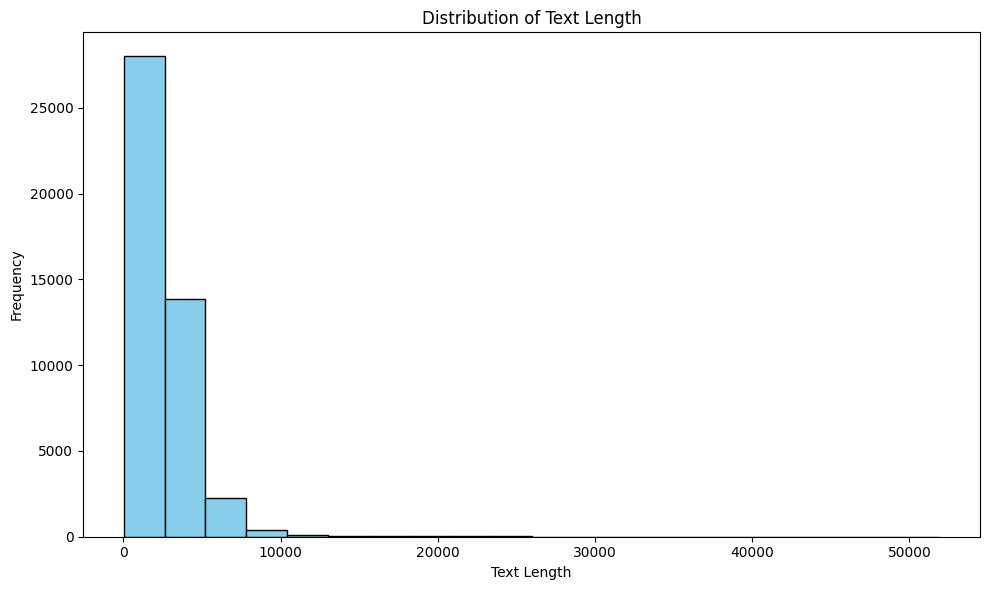

In [ ]:
word_length = news_data['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(word_length, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.tight_layout()
plt.show()


## **Preprocessing Data**

In [ ]:
news_data['processed_text'] = news_data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
news_data.head()

,text,label,processed_text
0,"as u.s. budget fight looms, republicans flip t...",1,as us budget fight looms republicans flip thei...
1,u.s. military to accept transgender recruits o...,1,us military to accept transgender recruits on ...
2,senior u.s. republican senator: 'let mr. muell...,1,senior us republican senator let mr mueller do...
3,fbi russia probe helped by australian diplomat...,1,fbi russia probe helped by australian diplomat...
4,trump wants postal service to charge 'much mor...,1,trump wants postal service to charge much more...


In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
news_data["processed_text"] = news_data["processed_text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

### **Vectorization, Word2Vec -- gensim**

Word2Vec utilising 2 architectures: Continuos bag of words (CBOW), Skipgram




In [ ]:
label = news_data['label'].values

In [ ]:
data = [d.split() for d in news_data['processed_text'].tolist()]

In [ ]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(data)

data = tokenizer.texts_to_sequences(data)

data = pad_sequences(data, maxlen = 1000)

In [ ]:
GLOVE_EMBEDDING = "/content/drive/MyDrive/Glove txt/glove.6B.100d.txt"

In [ ]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = "float32")
embeddings_index = dict(get_coefs(*g.rstrip().rsplit(" ")) for g in open(GLOVE_EMBEDDING))

In [ ]:
embeddings = np.stack(embeddings_index.values())
embedding_mean, embedding_std = embeddings.mean(), embeddings.std()
embedding_size = embeddings.shape[1]

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


### **Explore Vector Analysis**

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix = embedding_matrix = np.random.normal(embedding_mean, embedding_std, (vocab_size, embedding_size))
for word, i in word_index.items():
    if i >= 10000:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

### **Architect Model with CNN & LSTM**

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=100, weights = [embedding_matrix], input_length= 1000, trainable= False))
model.add(Conv1D(32,4,activation='relu'))
model.add(AvgPool1D())
model.add(Conv1D(64,4,activation='relu'))
model.add(AvgPool1D())
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23056800  
                                                                 
 conv1d (Conv1D)             (None, 997, 32)           12832     
                                                                 
 average_pooling1d (AverageP  (None, 498, 32)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 495, 64)           8256      
                                                                 
 average_pooling1d_1 (Averag  (None, 247, 64)          0         
 ePooling1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 128)              

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,label)

In [ ]:
history  = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
842/842 [==============================] - 458s 540ms/step - loss: 0.2291 - acc: 0.9107 - val_loss: 0.1308 - val_acc: 0.9532
Epoch 2/5
842/842 [==============================] - 452s 537ms/step - loss: 0.1051 - acc: 0.9622 - val_loss: 0.0759 - val_acc: 0.9725
Epoch 3/5
842/842 [==============================] - 457s 543ms/step - loss: 0.0652 - acc: 0.9766 - val_loss: 0.0561 - val_acc: 0.9777
Epoch 4/5
842/842 [==============================] - 455s 541ms/step - loss: 0.0441 - acc: 0.9842 - val_loss: 0.0456 - val_acc: 0.9829
Epoch 5/5
842/842 [==============================] - 458s 544ms/step - loss: 0.0334 - acc: 0.9878 - val_loss: 0.0513 - val_acc: 0.9834


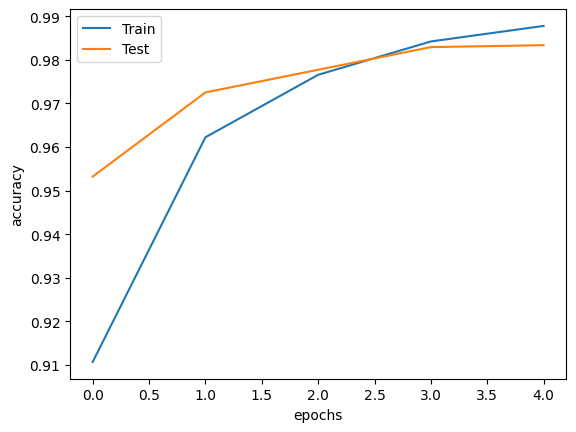

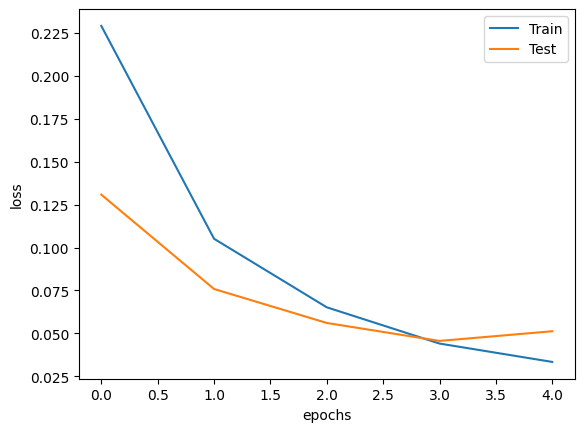

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 58s 162ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9836971046770602

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5897
           1       0.98      0.99      0.98      5328

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



<Axes: >

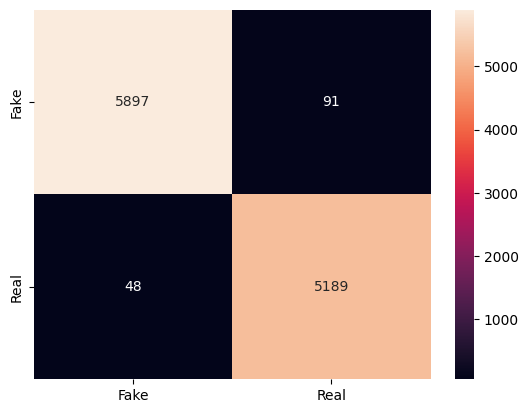

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels = ['Fake','Real'] , yticklabels = ['Fake','Real'])

**Manual Testing**

In [ ]:
str = ['As U.S. budget fight looms, Republicans flip their fiscal script The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid.']
str = tokenizer.texts_to_sequences(str);
str = pad_sequences(str, maxlen=1000);
result = (model.predict(str) >=0.5).astype(int);

value = result[0][0]

if value == 1:
  print("True news")
else:
  print("Fake news")

1/1 [==============================] - 0s 70ms/step
True news
